Mean score:  0.8959956705495282
Best Random Forest:  {'max_depth': 130, 'n_estimators': 300}


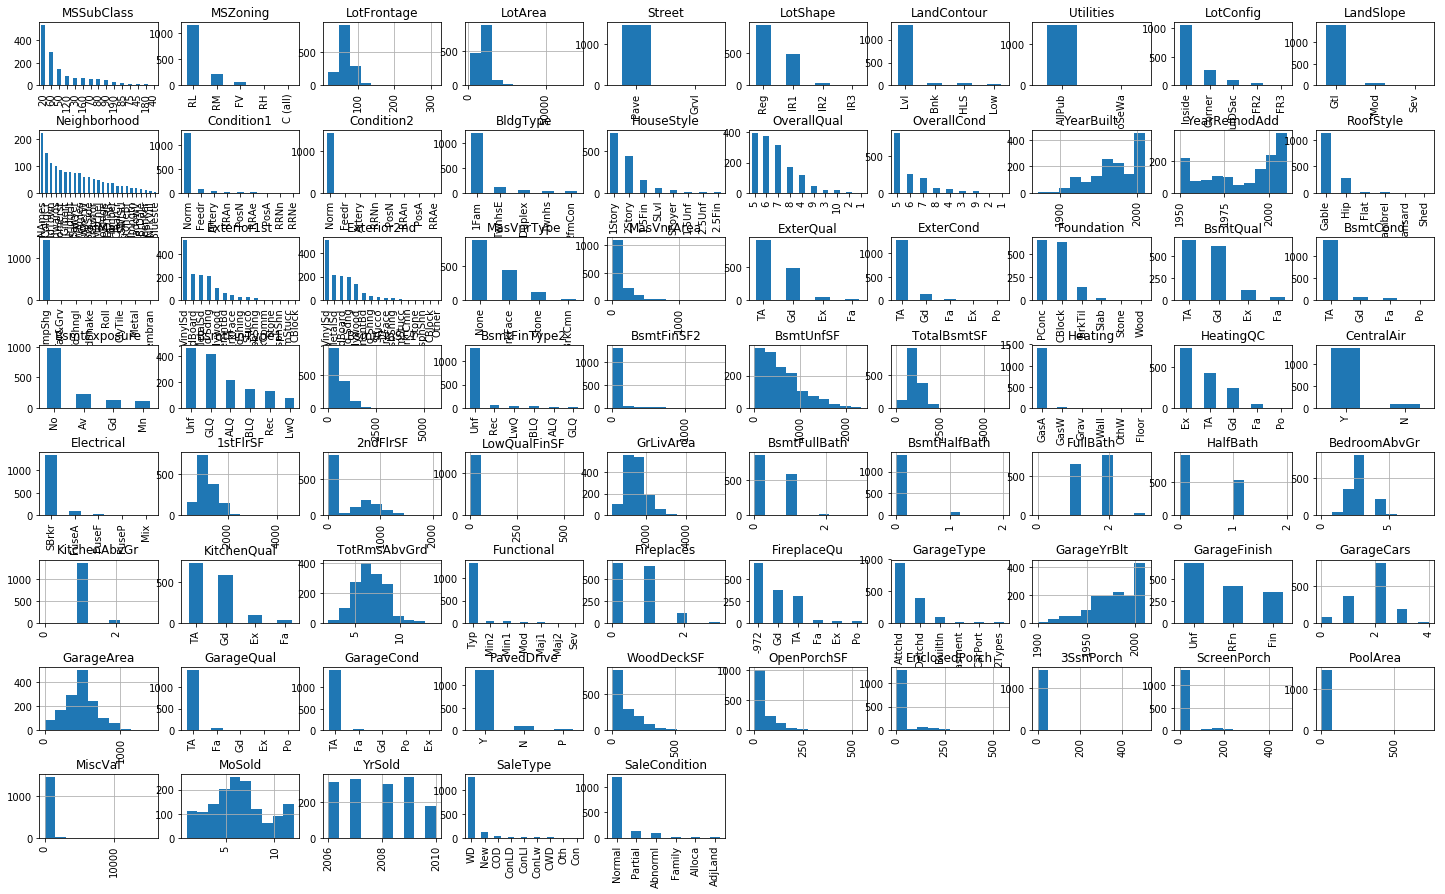

In [47]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

# We have 80 features
df = pd.read_csv('/Users/igormishurov/Documents/house-prices-advanced-regression-techniques/train.csv')
y = df['SalePrice']

# Delete almost empty columns and outliers
df = df.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
df = df.loc[df['LotArea'] < 100000]

# Deal with NaN. Object columns fill with mode, numeric with mean
columns_to_fill = ['MasVnrType','MasVnrArea','LotFrontage','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
df['FireplaceQu'] = df['FireplaceQu'].fillna('-972')

y = df['SalePrice']
df = df.drop('SalePrice', axis = 1)

for i in df.columns:
    if (df[i].dtype == 'object'):
        df[i] = df[i].fillna(df[i].mode()[0])
    elif((df[i].dtype == 'int64') | (df[i].dtype == 'float64')):
        df[i] = df[i].fillna(df[i].mean())

# Present some numerical features as factor.
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')

# Distribution for categorical and numerical features
fig = plt.figure(figsize=(25,15))
cols = 10
rows = np.ceil(float(df.shape[1]) / cols)
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
        plt.subplots_adjust(hspace=0.7, wspace=0.2)

# Apply LabelEncoder for categorical columns
encoder = LabelEncoder()
for i in df.columns:
    if (df[i].dtype == 'object'):
        df[i] = encoder.fit_transform(df[i])

# GridSearch and K-Fold Cross check for RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(df, y)
params = {'max_depth' : [100, 130, 150], 'n_estimators' : [100, 300, 400]}    
k_fold = KFold(n_splits=5)
best_model = GridSearchCV(RandomForestRegressor(), params, cv = k_fold)
best_model.fit(X_train, y_train)
print("Mean score: ", best_model.score(X_test, y_test))
print("Best Random Forest: ", best_model.best_params_)
